In [25]:
import pandas as pd
import numpy as np
import seaborn as sns 


In [92]:
data_distp = pd.read_csv("/Users/sylvainestebe/Code/nlp_project/cognitive_distortion_project/data/corpus_kmean_matrice.csv")


In [93]:
data_distp

,Unnamed: 0,X.1,X,corpus_kmean,Unnamed..0,thought,original_label,cleaned_thought,all.mpnet.base.v2.x,all.mpnet.base.v2.y,all.MiniLM.L12.v2.x,all.MiniLM.L12.v2.y,All.Distilroberta.v1.x,All.Distilroberta.v1.y,all.mpnet.base.v2.k.mean,all.MiniLM.L12.v2.k.mean,All.Distilroberta.v1.k.mean
0,1,1,1,295,295,I'm completely self-centered and thoughtless,all-or-nothing thinking,im completely selfcentered thoughtless,6.378186,2.122297,6.242015,7.926184,4.952197,6.136735,4,5,12
1,2,2,2,298,298,I'm a total failure,all-or-nothing thinking,im total failure,8.083822,3.651185,7.927596,8.558690,7.074046,5.888460,12,1,0
2,3,3,3,311,311,My speech isn't any good,all-or-nothing thinking,speech isnt good,7.334440,4.073163,6.750960,9.241931,7.054872,5.828250,3,10,3
3,4,4,4,318,318,I'm not getting anywhere,all-or-nothing thinking,im getting anywhere,8.259113,3.113390,7.770506,8.992944,6.370828,5.425458,12,1,0
4,5,5,5,321,321,I just can't control myself,all-or-nothing thinking,cant control,7.744770,1.061800,7.000506,7.358897,4.726725,4.321452,8,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,918,918,918,80,80,they should have reminded me before I forgot,should statements,reminded forgot,7.234946,4.903232,6.585809,10.032252,7.834796,4.571655,10,9,8
918,919,919,919,126,126,I shouldn't have changed my hair,should statements,shouldnt changed hair,6.295496,5.336271,6.094548,10.037593,6.889112,3.742727,10,9,10
919,920,920,920,145,145,I should have ordered a milder dish,should statements,ordered milder dish,5.830078,6.252317,7.765282,5.902802,5.945036,2.939081,3,9,10
920,921,921,921,160,160,I feel so anxious maybe I left something turne...,should statements,feel anxious maybe left something turned kitchen,5.900304,6.637208,6.646158,5.778532,5.533870,3.023739,3,12,10


In [95]:
df = data_distp[["original_label", "all.mpnet.base.v2.k.mean","all.MiniLM.L12.v2.k.mean","All.Distilroberta.v1.k.mean"]]


In [97]:
# Créez une nouvelle colonne 'Numero' en utilisant une fonction de mapping
label_to_numero = {}
current_numero = 0

def assign_numero(label):
    global current_numero
    if label.lower() not in label_to_numero:
        label_to_numero[label.lower()] = current_numero
        current_numero += 1
    return label_to_numero[label.lower()]

df['Numero'] = df['original_label'].apply(assign_numero)

# Affichez le tableau mis à jour
print(df)

              original_label  all.mpnet.base.v2.k.mean  \
0    all-or-nothing thinking                         4   
1    all-or-nothing thinking                        12   
2    all-or-nothing thinking                         3   
3    all-or-nothing thinking                        12   
4    all-or-nothing thinking                         8   
..                       ...                       ...   
917        should statements                        10   
918        should statements                        10   
919        should statements                         3   
920        should statements                         3   
921        should statements                         1   

     all.MiniLM.L12.v2.k.mean  All.Distilroberta.v1.k.mean  Numero  
0                           5                           12       0  
1                           1                            0       0  
2                          10                            3       0  
3                          

/var/folders/td/5r8mr8t14cn_c4w5c8ty48lw0000gn/T/ipykernel_45049/439087515.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Numero'] = df['original_label'].apply(assign_numero)


In [112]:
matrice_frequence = pd.crosstab(df["original_label"], df["all.mpnet.base.v2.k.mean"])
matrice_frequence2 = pd.crosstab(df["original_label"], df["all.MiniLM.L12.v2.k.mean"])
matrice_frequence3 = pd.crosstab(df["original_label"], df["All.Distilroberta.v1.k.mean"])



<Axes: xlabel='All.Distilroberta.v1.k.mean', ylabel='original_label'>

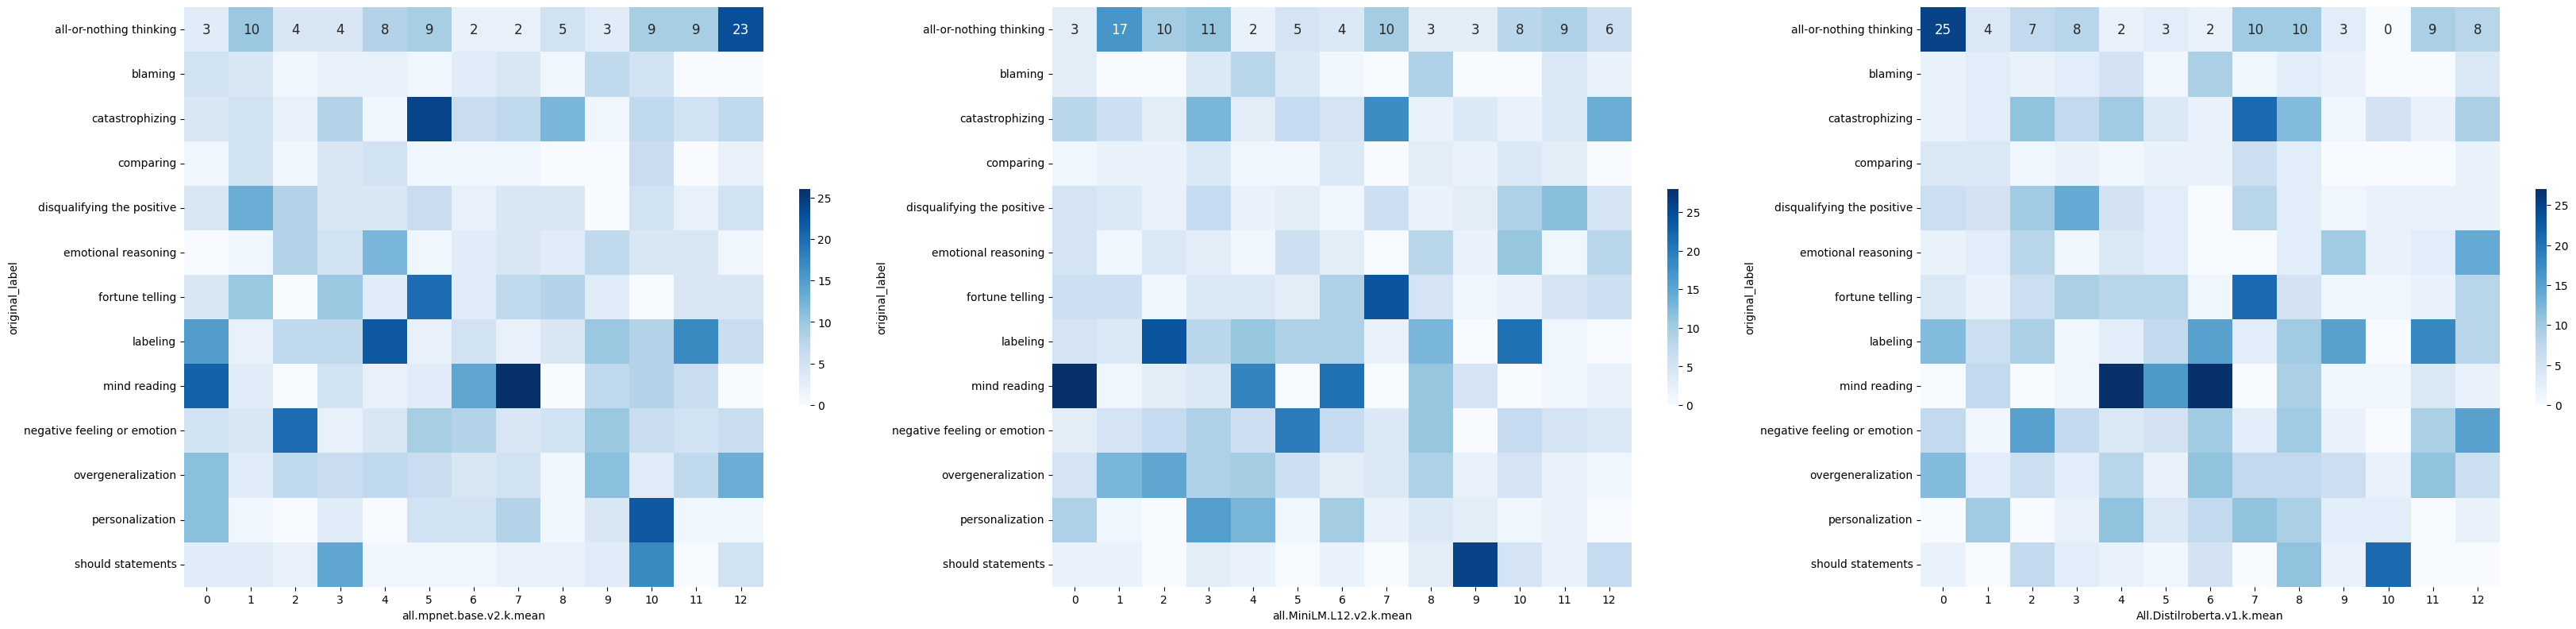

In [123]:
import matplotlib.pyplot as plt
# Here we create a figure instance, and two subplots
fig = plt.figure(figsize = (40,40)) # width x height
ax1 = fig.add_subplot(3, 3, 1) # row, column, position
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)

sns.heatmap(matrice_frequence, ax=ax1, cmap = "Blues", square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12})
sns.heatmap(matrice_frequence2, ax=ax2, cmap = "Blues", square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12})
sns.heatmap(matrice_frequence3, ax=ax3, cmap = "Blues", square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12})
